# Actividad Tres

### Instrucciones:

1. Lea los datos en un objeto Pandas dataframe.

2. Seleccione la columna de ventas como variable de respuesta y la columna de presupuesto de TV como variable predictora.

3. Haga una división entrenamiento-prueba usando 'sklearn.model_selection.train_test_split'.

4. Crear una lista de valores enteros 'k' utilizando numpy.linspace.

5. Para cada valor de 'k'

- Ajuste una regresión 'kNN' en el conjunto de entrenamiento.

- Calcula el MSE en el conjunto de prueba y guárdalo.

6. Represente gráficamente los valores de MSE de prueba para cada 'k'.

7. Busque el valor 'k' asociado al MSE de prueba más bajo.

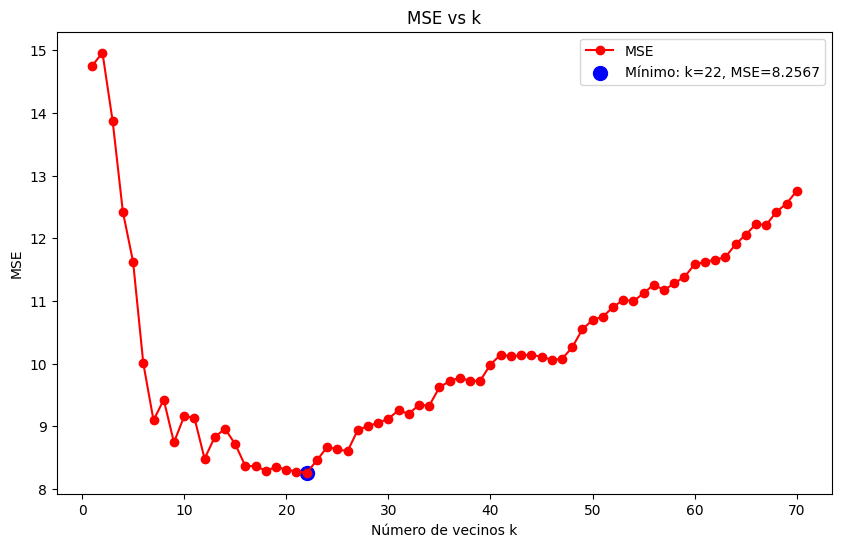

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # División del conjunto de datos
from sklearn.neighbors import KNeighborsRegressor # Ajustar los datos de entrenamiento 
from sklearn.metrics import mean_squared_error # Para calcular error

# Leemos el CSV  y lo convertimos en un dataframe
df = pd.read_csv(r"C:\Users\Carlo\OneDrive\Documentos\curso-ciencia-datos\Datos\Unidad_uno\Advertising.csv")

# Definimos la lista de k's de 1 a 70
k_list = range(1, 71)

# Guardamos las variables independiente y dependiente
X = df[['TV']].values # Extraemos los valores de la calumna 'Tv' del nuevo DataFrame
y = df['Sales'].values # Extraemos los valores de la calumna 'Sales' del nuevo DataFrame

# Dividimos los datos con 30% datos para el test y 70% para la prueba, random_state fija la semilla para reproducirlo de nuevo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

mse_list = [] # Para almacenar errores

# Evaluamos kNN para cada valor de k en k_list y calculamos error
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors = k) # Modelo para k vecinos
    knn.fit(X_train, y_train) # Ajustamos el modelo con los datos de prueba
    y_pred = knn.predict(X_test) # Predecimos la variable dependiente con los datos de prueba
    mse = mean_squared_error(y_test, y_pred) # calculamos el error cuadratico medio
    mse_list.append(mse) # se guarda el error para este k

# Se grafica MSE vs cada k
plt.figure(figsize=(10,6))
mse_min = min(mse_list)
k_min = k_list[np.argmin(mse_list)]

plt.plot(k_list, mse_list, marker="o", color="red", label="MSE")

plt.scatter(k_min, mse_min, color="blue", s=100,
            label=f"Mínimo: k={k_min}, MSE={mse_min:.4f}")
plt.xlabel("Número de vecinos k")
plt.ylabel("MSE")
plt.title("MSE vs k")
plt.legend()
plt.show()

